In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [91]:
def parse_sensor_csv(path, attributes):
    df = pd.read_csv(path)
    new_df = df[attributes].copy()
    new_df = new_df.dropna()
    return new_df

In [92]:
path = 'sensor.csv'
attributes = ['sensor_00', 'sensor_01']
df = parse_sensor_csv(path, attributes)
df

,sensor_00,sensor_01
0,2.465394,47.09201
1,2.465394,47.09201
2,2.444734,47.35243
3,2.460474,47.09201
4,2.445718,47.13541
...,...,...
220315,2.407350,47.69965
220316,2.400463,47.69965
220317,2.396528,47.69965
220318,2.406366,47.69965


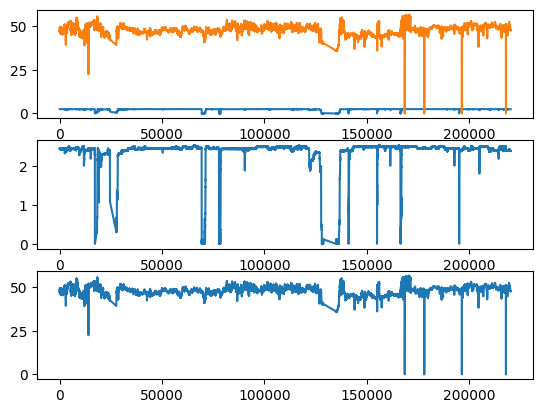

In [93]:
plt.subplot(3, 1, 1).plot(df['sensor_00'])
plt.subplot(3, 1, 1).plot(df['sensor_01'])

plt.subplot(3, 1, 2).plot(df['sensor_00'])
plt.subplot(3, 1, 3).plot(df['sensor_01'])

In [94]:
def cluster_data(data, n):
    kmeans = KMeans(n_clusters=n, n_init='auto', random_state=42)
    kmeans.fit(data)
    return kmeans

In [95]:
def find_outliers(dataframe, threshold, kmeans_model):
    data_points = dataframe.to_numpy()
    outliers = []
    outlier_indices = []

    for i in range(len(data_points)):
        point = data_points[i]
        cluster_id = kmeans_model.labels_[i]
        cluster_centroid = kmeans_model.cluster_centers_[cluster_id]
        if np.linalg.norm(cluster_centroid-point) > threshold:
            outliers.append(point)
            outlier_indices.append(i)
    return np.asarray(outliers), outlier_indices

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

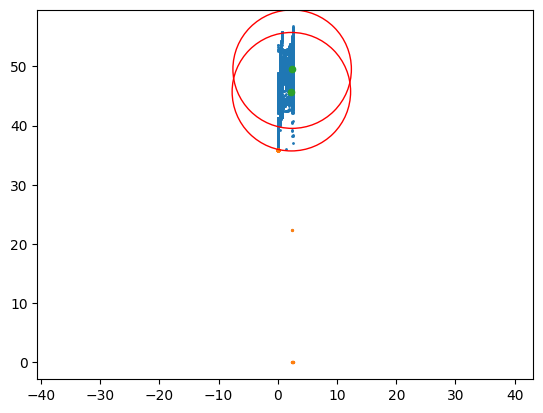

In [101]:
thresh = 10
kmeans = cluster_data(data=df, n=2)
outliers, indices = find_outliers(df, threshold=thresh, kmeans_model=kmeans)
plt.scatter(df.values[:,0], df.values[:,1], s=1)
plt.scatter(outliers[:,0], outliers[:,1], s=2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20)

for centroid in kmeans.cluster_centers_:
    circle = plt.Circle((centroid[0], centroid[1]), thresh, color='r', fill=False)
    plt.gca().add_artist(circle)

plt.axis('equal')
kmeans.labels_

151


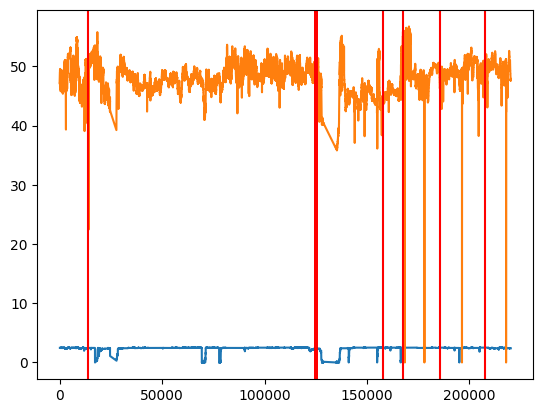

In [102]:
plt.plot(df)

for index in indices:
    plt.axvline(x=index, c='red')

print(len(indices))